<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.21

(Programming exercise) An alternative method that can be used to simulate dynamical systems is the Runge–Kutta method. Figure 6.39 gives an algorithm for the Runge–Kutta method to simulate a dynamical system in two variables,
\begin{aligned}
\frac{dx_1}{dt} &= f_1(x_1, x_2) \\
\frac{dx_2}{dt} &= f_2(x_1, x_2).
\end{aligned}

For a fairly small step size $h$, Runge–Kutta has the property that doubling the number of steps (halving $h$) produces results approximately 16 times more accurate.

### a) Implement the Runge–Kutta method on a computer.

In [ ]:
def MetodoRungeKutta(funcoes, variaveis, x1_0, x2_0, N=100, t_0=0, T=400):
    retorno = np.zeros((3, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    
    x1_n = x1_0
    x2_n = x2_0
    t_n = t_0

    retorno[:, 0] = [t_n, x1_n, x2_n]

    h = (T-t_0)/N
    for n in range(N-1):
        r1 = f1(x1_n, x2_n)
        s1 = f2(x1_n, x2_n)
        r2 = f1(x1_n + (h/2)*r1, x2_n+(h/2)*s1)
        s2 = f2(x1_n + (h/2)*r1, x2_n+(h/2)*s1)

        r3 = f1(x1_n + (h/2)*r2, x2_n+(h/2)*s2)
        s3 = f2(x1_n + (h/2)*r2, x2_n+(h/2)*s2)

        r4 = f1(x1_n + h*r3, x2_n + h*s3)
        s4 = f2(x1_n + h*r3, x2_n + h*s3)

        x1_n = x1_n + (h/6)*(r1 + 2*r2 + 2*r3 + 2*r4)
        x2_n = x2_n + (h/6)*(s1 + 2*s2 + 2*s3 + 2*s4)

        t_n = t_n+h
        retorno[:, n+1] = [t_n, x1_n, x2_n]
    
    return pd.DataFrame(retorno.T, columns=['t', 'x1', 'x2'])

### b) Verify your computer implementation by using it to solve the linear system given by Eq. (5.18) in Chapter 5. Compare your results to the analytic solution in Eq. (5.19) for the case $c_1=1; c_2=0$.
 
O Sistema linear da Equação 5.18
\begin{align}
\begin{pmatrix}
x_1' \\
x_2'
\end{pmatrix}
&=
\begin{pmatrix}
-4 & -1 \\
 3 &  0
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\end{align}
corresponde a 
\begin{align}
x_1' &= -4x_1 - x_2 \\
x_2' &= 3x_1
\end{align}
Para executar o modelo, necessitamos definir os valores iniciais de $x_1$ e de $x_2$. Para isso, vejamos a Equação 5.19,
\begin{align}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
=
c_1 
\begin{pmatrix}
 -1 \\
  1 
\end{pmatrix}
e^{-3t}
+
c_2
\begin{pmatrix}
 -1 \\
  3
\end{pmatrix}
e^{-t},
\end{align}
que, para $c_1=1$ e $c_2=0$, fica como 
\begin{align}
x_1(t) &= -e^{-3t} \\
x_2(t) &= e^{-3t}.
\end{align}
 
 
Ao pegarmos a Equação 5.19 no tempo $t=0$, $c_1=1$ e $c_2=0$, conseguimos definir valores inicias de $x_1$ e de $x_2$:
\begin{align}
x_1(0) &= -e^{-3\cdot0} = -1 \\
x_2(0) &= e^{-3\cdot0} = 1.
\end{align}

#### Simulação com Runge–Kutta

A simulação executada possui $N=400$ e $T=10$, de modo que $h=\frac{T}{N} =0.025$, número aqui considerado suficientemente pequeno, de modo que atenda o comentado na questão
> _For a fairly small step size $h$, Runge–Kutta has the property that doubling the number of steps (halving $h$) produces results approximately 16 times more accurate._


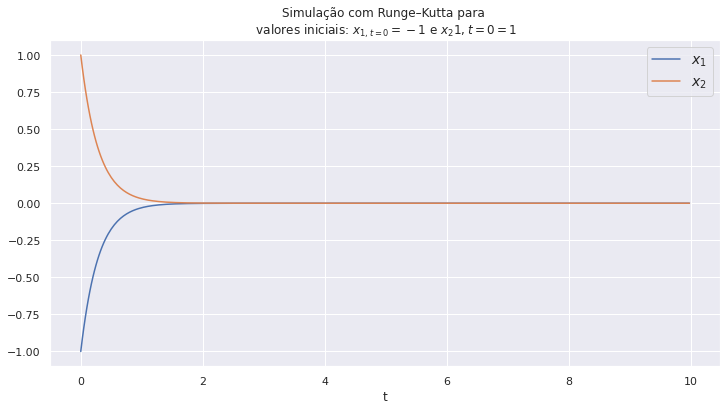

In [ ]:
x1, x2 = var('x1 x2', real=True)

simulacao_b = MetodoRungeKutta(
    funcoes=[
        -4*x1 -1*x2,
        3*x1
    ],
    variaveis=(x1, x2),
    x1_0=-1,
    x2_0=1,
    N=400,
    T=10
)
simulacao_b.index = simulacao_b.t
del simulacao_b['t']
ax = simulacao_b.plot(title='Simulação com Runge–Kutta para \n valores iniciais: $x_{1,t=0}=-1$ e $x_2{1,t=0}=1$', figsize=(12, 6))
ax.legend(['$x_1$', '$x_2$'])

#### Execução analítica para $c_1=1$ e $c_2=0$

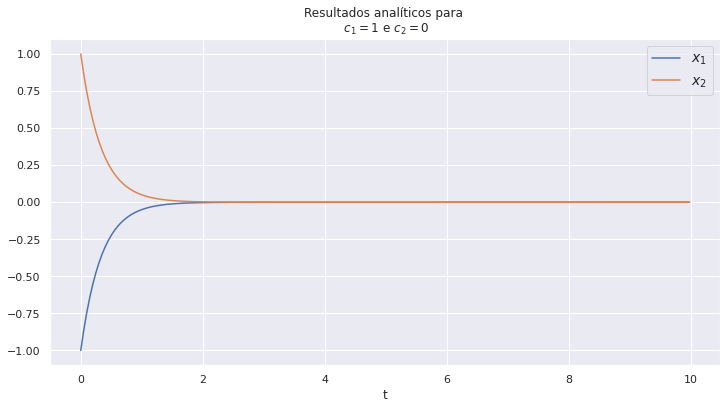

In [ ]:
t = var('t', real=True)

x1_t = -E**(-3*t)
x2_t = E**(-3*t)

analitico_b = pd.DataFrame({
    't': simulacao_b.index,
    'x1': [float(N(x1_t.subs({t: i}))) for i in simulacao_b.index],
    'x2': [float(N(x2_t.subs({t: i}))) for i in simulacao_b.index]
})
analitico_b.index = analitico_b.t
del analitico_b['t']
ax = analitico_b.plot(title='Resultados analíticos para \n $c_1=1$ e $c_2=0$', figsize=(12, 6))
ax.legend(['$x_1$', '$x_2$'])

#### Comparação
 
Os 20 primeiros valores da simulação (colunas x1 e x2 da esquerda) e 20 primeiros valores do resultado analítico (colunas x1 e x2 da direita)

In [ ]:
comparacao = pd.concat([simulacao_b, analitico_b], axis=1).head(20)
comparacao['Erro absoluto x1'] = np.abs(analitico_b.x1-simulacao_b.x1)
comparacao['Erro relativo x1'] = np.abs(analitico_b.x1-simulacao_b.x1)/np.abs(analitico_b.x1)
comparacao['Erro absoluto x2'] = np.abs(analitico_b.x2-simulacao_b.x2)
comparacao['Erro relativo x2'] = np.abs(analitico_b.x2-simulacao_b.x2)/np.abs(analitico_b.x2)

comparacao

,x1,x2,x1,x2,Erro absoluto x1,Erro relativo x1,Erro absoluto x2,Erro relativo x2
t,,,,,,,,
0.000,-1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
0.025,-0.916147,0.916147,-0.927743,0.927743,0.011596,0.012499,0.011596,0.012499
0.050,-0.839326,0.839326,-0.860708,0.860708,0.021382,0.024843,0.021382,0.024843
0.075,-0.768946,0.768946,-0.798516,0.798516,0.029570,0.037032,0.029570,0.037032
0.100,-0.704468,0.704468,-0.740818,0.740818,0.036351,0.049068,0.036351,0.049068
0.125,-0.645396,0.645396,-0.687289,0.687289,0.041893,0.060954,0.041893,0.060954
0.150,-0.591278,0.591278,-0.637628,0.637628,0.046351,0.072692,0.046351,0.072692
0.175,-0.541697,0.541697,-0.591555,0.591555,0.049858,0.084283,0.049858,0.084283
0.200,-0.496274,0.496274,-0.548812,0.548812,0.052537,0.095729,0.052537,0.095729


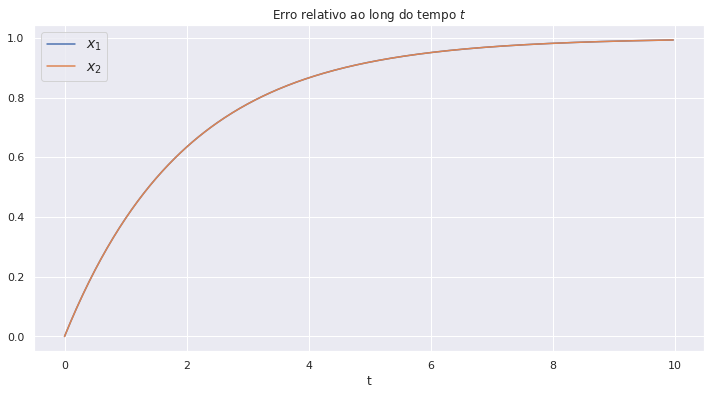

In [ ]:
pd.DataFrame({
    '$x_1$': np.abs(analitico_b.x1-simulacao_b.x1)/np.abs(analitico_b.x1),
    '$x_2$': np.abs(analitico_b.x2-simulacao_b.x2)/np.abs(analitico_b.x2)
}).plot(title='Erro relativo ao long do tempo $t$', figsize=(12, 6))

Pelo gráfico acima e pela tabela acima, podemos observar que a medida que o tempo $t$ aumenta, o erro relativo aumenta também tanto para a variável $x_1$ como para a variável $x_2$, logo a aproximação para a solução analítica feita pelo método de Runge-Kutta começa a não convergir tão bem, pois o erro relativo começa a se distanciar do valor $0.0$.

### c) Verify the results obtained in Figs. 6.20 and 6.21 for the RLC circuit problem of Example 6.3.

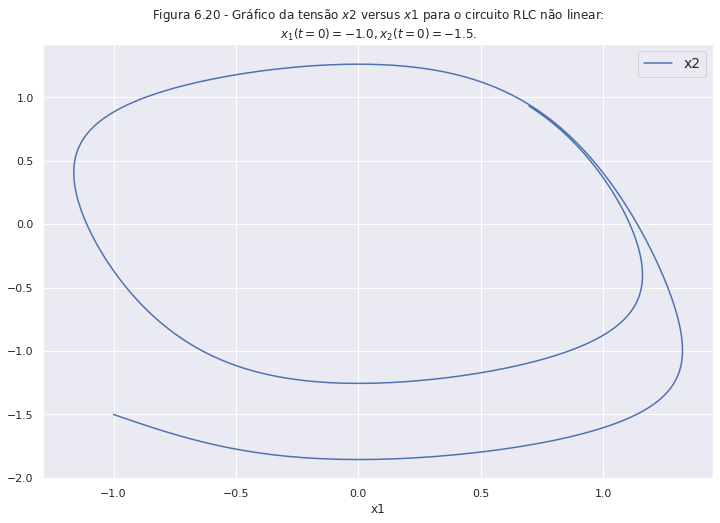

In [ ]:
x1, x2 = var('x1 x2', real=True)

MetodoRungeKutta(
    funcoes=[
        x1-x1**3-x2,
        x1
    ],
    variaveis=(x1, x2),
    x1_0=-1,
    x2_0=-1.5,
    N=500,
    T=8.7
).plot.line(x='x1', y='x2', title='Figura 6.20 - Gráfico da tensão $x2$ versus $x1$ para o circuito RLC não linear:\n$x_1(t=0)=−1.0, x_2(t=0) =−1.5$.', figsize=(12, 8))

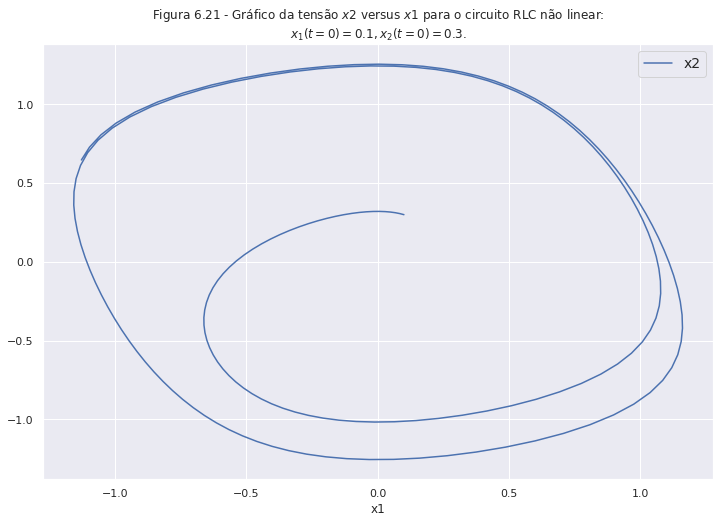

In [ ]:
x1, x2 = var('x1 x2', real=True)

MetodoRungeKutta(
    funcoes=[
        x1-x1**3-x2,
        x1
    ],
    variaveis=(x1, x2),
    x1_0=0.1,
    x2_0=0.3,
    N=200,
    T=12.5
).plot.line(x='x1', y='x2', title='Figura 6.21 - Gráfico da tensão $x2$ versus $x1$ para o circuito RLC não linear:\n$x_1(t=0)=0.1, x_2(t=0)=0.3$.', figsize=(12, 8))